In [28]:
import gridworld
import gym
from gym import wrappers
import numpy as np

import gridworld
import gym
from gym import wrappers
import numpy as np
import random
from scipy.special import softmax
from matplotlib import pyplot as plt
%matplotlib inline


class qlearningAgent():
    def __init__(self,state_dict, states, actions, exploration_rate=1., exploration_decay=0.99):
        self.exploration_decay = exploration_decay
        self.exploration_rate = exploration_rate
        self.state_dict = state_dict
        self.states = states
        self.actions = actions

        self.Q = np.random.uniform(0, 2, (max(self.states) + 1, self.actions))

    def updateQ(self, st, at, rt, stp, alpha=0.9, gamma=0.8):
        self.Q[self.state_dict[st.dumps()], at] = (1-alpha) * self.Q[self.state_dict[st.dumps()], at]  \
                                                  + alpha * (rt + gamma * np.max(self.Q[self.state_dict[stp.dumps()], :]))

    def exploration_policy(self, s):
        if np.random.uniform(0, 1) < self.exploration_rate:
            return np.random.randint(0, self.actions)
        else:
            return np.argmax(self.Q[self.state_dict[s.dumps()], :])

    def act(self, s):
        return np.argmax(self.Q[s, :])

In [39]:


plan = "plan0"
episode_count = 1000

alpha = 0.5
gamma = 0.99
name = "naive qlearning"
gammas = [0.1, 0.5, 0.8, 0.9]



if __name__ == '__main__':
    
    rsum_hist_gammas = []
    rewards = []
    for gamma in gammas:
        # Simple execution
        rsum_hist = []
        env = gym.make("gridworld-v0")
        env.seed(0)  # Initialise le seed du pseudo-random

        env.verbose = False
        #env.render()  # permet de visualiser la grille du jeu (si verbose = True)

        statedic, mdp = env.getMDP()

        clean_mdp = {statedic[s]: v for s, v in mdp.items()}

        agent = qlearningAgent(statedic, [statedic[s] for s, t in list(mdp.items())], env.action_space.n)

        # Faire un fichier de log sur plusieurs scenarios
        outdir = f'gridworld-v0/{plan}naive-qlearning'
        envm = wrappers.Monitor(env, directory=outdir, force=True, video_callable=False)
        env.setPlan(f"gridworldPlans/{plan}.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})
        env.seed()  # Initialiser le pseudo aleatoire
        reward = 0
        done = False
        rsum = 0
        for i in range(episode_count):
            obs = envm.reset()
            env.verbose = (i % 100 == 0 and i > 0)  # afficher 1 episode sur 100

            #env.render(0.1)
            j = 0
            rsum = 0
            while True:
                action = agent.exploration_policy(obs)
                prev_obs = np.copy(obs)
                obs, reward, done, _ = envm.step(action)
                agent.updateQ(prev_obs, action, reward, obs, alpha= alpha, gamma=gamma)
                rsum += reward
                j += 1
                #env.render()
                if done:
                    print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
                    rsum_hist.append(rsum)
                    break
                    
            
            agent.exploration_rate *= agent.exploration_decay
            print(agent.exploration_rate)
            
        rsum_hist_gammas.append(rsum_hist)

        print("done")

        rewards.append(rsum)
        env.close()


['1 1 1 1 1 1\n', '1 0 0 0 3 1\n', '1 0 1 0 5 1\n', '1 0 0 0 2 1\n', '1 1 1 1 1 1\n', '1 1 1 1 1 1']
['1 1 1 1 1 1\n', '1 0 0 0 3 1\n', '1 0 1 0 5 1\n', '1 0 0 0 2 1\n', '1 1 1 1 1 1\n', '1 1 1 1 1 1']
Episode : 0 rsum=-1, 1 actions
0.99
Episode : 1 rsum=-1.002, 3 actions
0.9801
Episode : 2 rsum=-1, 1 actions
0.9702989999999999
Episode : 3 rsum=-1.001, 2 actions
0.96059601
Episode : 4 rsum=-1.005, 6 actions
0.9509900498999999
Episode : 5 rsum=-1.006, 7 actions
0.9414801494009999
Episode : 6 rsum=-1.016, 17 actions
0.9320653479069899
Episode : 7 rsum=-1.002, 3 actions
0.92274469442792
Episode : 8 rsum=0.949, 52 actions
0.9135172474836407
Episode : 9 rsum=-1, 1 actions
0.9043820750088043
Episode : 10 rsum=-1, 1 actions
0.8953382542587163
Episode : 11 rsum=-1.012, 13 actions
0.8863848717161291
Episode : 12 rsum=-1, 1 actions
0.8775210229989678
Episode : 13 rsum=-1.003, 4 actions
0.8687458127689781
Episode : 14 rsum=0.982, 19 actions
0.8600583546412883
Episode : 15 rsum=-1.002, 3 actions
0

Episode : 217 rsum=-1.023, 24 actions
0.1118078824235774
Episode : 218 rsum=0.989, 12 actions
0.11068980359934164
Episode : 219 rsum=0.98, 21 actions
0.10958290556334822
Episode : 220 rsum=-1.009, 10 actions
0.10848707650771475
Episode : 221 rsum=0.995, 6 actions
0.1074022057426376
Episode : 222 rsum=0.997, 4 actions
0.10632818368521123
Episode : 223 rsum=0.991, 10 actions
0.10526490184835911
Episode : 224 rsum=-1.005, 6 actions
0.10421225282987552
Episode : 225 rsum=0.992, 9 actions
0.10317013030157676
Episode : 226 rsum=0.984, 17 actions
0.10213842899856099
Episode : 227 rsum=0.991, 10 actions
0.10111704470857538
Episode : 228 rsum=0.986, 15 actions
0.10010587426148963
Episode : 229 rsum=0.989, 12 actions
0.09910481551887473
Episode : 230 rsum=0.997, 4 actions
0.09811376736368599
Episode : 231 rsum=0.996, 5 actions
0.09713262969004913
Episode : 232 rsum=0.987, 14 actions
0.09616130339314863
Episode : 233 rsum=-1.017, 18 actions
0.09519969035921715
Episode : 234 rsum=0.997, 4 actions


Episode : 372 rsum=0.979, 22 actions
0.023546566310951894
Episode : 373 rsum=-1.007, 8 actions
0.023311100647842375
Episode : 374 rsum=-1, 1 actions
0.02307798964136395
Episode : 375 rsum=0.995, 6 actions
0.022847209744950314
Episode : 376 rsum=0.98, 21 actions
0.02261873764750081
Episode : 377 rsum=0.99, 11 actions
0.022392550271025803
Episode : 378 rsum=0.943, 58 actions
0.022168624768315544
Episode : 379 rsum=0.938, 63 actions
0.02194693852063239
Episode : 380 rsum=0.981, 20 actions
0.021727469135426065
Episode : 381 rsum=0.97, 31 actions
0.021510194444071803
Episode : 382 rsum=0.995, 6 actions
0.021295092499631085
Episode : 383 rsum=0.984, 17 actions
0.021082141574634772
Episode : 384 rsum=0.963, 38 actions
0.020871320158888425
Episode : 385 rsum=0.992, 9 actions
0.020662606957299542
Episode : 386 rsum=-1.014, 15 actions
0.020455980887726547
Episode : 387 rsum=0.975, 26 actions
0.02025142107884928
Episode : 388 rsum=0.991, 10 actions
0.020048906868060788
Episode : 389 rsum=0.942, 5

Episode : 554 rsum=0.9359999999999999, 65 actions
0.0037803586280961026
Episode : 555 rsum=0.988, 13 actions
0.0037425550418151415
Episode : 556 rsum=0.99, 11 actions
0.00370512949139699
Episode : 557 rsum=0.973, 28 actions
0.0036680781964830204
Episode : 558 rsum=0.989, 12 actions
0.00363139741451819
Episode : 559 rsum=0.992, 9 actions
0.003595083440373008
Episode : 560 rsum=0.98, 21 actions
0.003559132605969278
Episode : 561 rsum=0.964, 37 actions
0.003523541279909585
Episode : 562 rsum=0.981, 20 actions
0.003488305867110489
Episode : 563 rsum=0.974, 27 actions
0.0034534228084393843
Episode : 564 rsum=0.939, 62 actions
0.0034188885803549903
Episode : 565 rsum=0.995, 6 actions
0.0033846996945514404
Episode : 566 rsum=0.971, 30 actions
0.003350852697605926
Episode : 567 rsum=0.9359999999999999, 65 actions
0.0033173441706298664
Episode : 568 rsum=0.978, 23 actions
0.0032841707289235677
Episode : 569 rsum=0.985, 16 actions
0.0032513290216343318
Episode : 570 rsum=0.991, 10 actions
0.0032

Episode : 713 rsum=0.986, 15 actions
0.0007647666530203482
Episode : 714 rsum=0.972, 29 actions
0.0007571189864901448
Episode : 715 rsum=0.983, 18 actions
0.0007495477966252433
Episode : 716 rsum=0.984, 17 actions
0.0007420523186589909
Episode : 717 rsum=0.988, 13 actions
0.000734631795472401
Episode : 718 rsum=0.99, 11 actions
0.0007272854775176769
Episode : 719 rsum=0.98, 21 actions
0.0007200126227425002
Episode : 720 rsum=0.981, 20 actions
0.0007128124965150752
Episode : 721 rsum=0.986, 15 actions
0.0007056843715499244
Episode : 722 rsum=0.991, 10 actions
0.0006986275278344252
Episode : 723 rsum=0.976, 25 actions
0.000691641252556081
Episode : 724 rsum=0.973, 28 actions
0.0006847248400305201
Episode : 725 rsum=0.9289999999999999, 72 actions
0.0006778775916302149
Episode : 726 rsum=0.984, 17 actions
0.0006710988157139127
Episode : 727 rsum=0.9339999999999999, 67 actions
0.0006643878275567735
Episode : 728 rsum=0.975, 26 actions
0.0006577439492812059
Episode : 729 rsum=0.966, 35 actio

Episode : 893 rsum=0.948, 53 actions
0.0001252748727317126
Episode : 894 rsum=0.984, 17 actions
0.00012402212400439546
Episode : 895 rsum=0.9119999999999999, 89 actions
0.0001227819027643515
Episode : 896 rsum=0.983, 18 actions
0.00012155408373670799
Episode : 897 rsum=0.8739999999999999, 127 actions
0.0001203385428993409
Episode : 898 rsum=0.982, 19 actions
0.0001191351574703475
Episode : 899 rsum=0.957, 44 actions
0.00011794380589564402
Episode : 900 rsum=0.954, 47 actions
0.00011676436783668758
Episode : 901 rsum=0.974, 27 actions
0.0001155967241583207
Episode : 902 rsum=0.98, 21 actions
0.0001144407569167375
Episode : 903 rsum=0.989, 12 actions
0.00011329634934757011
Episode : 904 rsum=0.992, 9 actions
0.0001121633858540944
Episode : 905 rsum=0.978, 23 actions
0.00011104175199555346
Episode : 906 rsum=0.987, 14 actions
0.00010993133447559792
Episode : 907 rsum=0.949, 52 actions
0.00010883202113084194
Episode : 908 rsum=0.9169999999999999, 84 actions
0.00010774370091953352
Episode :

Episode : 163 rsum=-1.015, 16 actions
0.1923853128939671
Episode : 164 rsum=-1.009, 10 actions
0.19046145976502743
Episode : 165 rsum=0.98, 21 actions
0.18855684516737714
Episode : 166 rsum=-1.001, 2 actions
0.18667127671570335
Episode : 167 rsum=-1.007, 8 actions
0.18480456394854633
Episode : 168 rsum=-1.012, 13 actions
0.18295651830906087
Episode : 169 rsum=-1.006, 7 actions
0.18112695312597027
Episode : 170 rsum=0.989, 12 actions
0.17931568359471056
Episode : 171 rsum=-1.03, 31 actions
0.17752252675876345
Episode : 172 rsum=-1.019, 20 actions
0.17574730149117582
Episode : 173 rsum=-1, 1 actions
0.17398982847626407
Episode : 174 rsum=-1.001, 2 actions
0.17224993019150142
Episode : 175 rsum=-1.002, 3 actions
0.1705274308895864
Episode : 176 rsum=0.993, 8 actions
0.16882215658069055
Episode : 177 rsum=-1, 1 actions
0.16713393501488363
Episode : 178 rsum=0.994, 7 actions
0.16546259566473479
Episode : 179 rsum=0.994, 7 actions
0.16380796970808745
Episode : 180 rsum=0.98, 21 actions
0.162

Episode : 314 rsum=0.989, 12 actions
0.04217803066508773
Episode : 315 rsum=-1.005, 6 actions
0.04175625035843686
Episode : 316 rsum=0.996, 5 actions
0.041338687854852486
Episode : 317 rsum=0.984, 17 actions
0.04092530097630396
Episode : 318 rsum=0.993, 8 actions
0.040516047966540916
Episode : 319 rsum=0.978, 23 actions
0.04011088748687551
Episode : 320 rsum=0.99, 11 actions
0.03970977861200675
Episode : 321 rsum=0.972, 29 actions
0.03931268082588668
Episode : 322 rsum=-1.006, 7 actions
0.03891955401762781
Episode : 323 rsum=0.992, 9 actions
0.03853035847745153
Episode : 324 rsum=-1.013, 14 actions
0.03814505489267701
Episode : 325 rsum=0.997, 4 actions
0.03776360434375024
Episode : 326 rsum=-1.009, 10 actions
0.03738596830031274
Episode : 327 rsum=-1.008, 9 actions
0.03701210861730961
Episode : 328 rsum=-1.003, 4 actions
0.03664198753113651
Episode : 329 rsum=-1.004, 5 actions
0.036275567655825146
Episode : 330 rsum=0.9259999999999999, 75 actions
0.03591281197926689
Episode : 331 rsum

Episode : 490 rsum=0.988, 13 actions
0.0071925112092996
Episode : 491 rsum=0.992, 9 actions
0.007120586097206604
Episode : 492 rsum=0.986, 15 actions
0.007049380236234538
Episode : 493 rsum=-1.019, 20 actions
0.006978886433872193
Episode : 494 rsum=0.986, 15 actions
0.006909097569533471
Episode : 495 rsum=0.977, 24 actions
0.006840006593838137
Episode : 496 rsum=0.962, 39 actions
0.0067716065278997555
Episode : 497 rsum=0.992, 9 actions
0.006703890462620758
Episode : 498 rsum=0.981, 20 actions
0.006636851557994551
Episode : 499 rsum=0.969, 32 actions
0.006570483042414605
Episode : 500 rsum=0.979, 22 actions
0.006504778211990459
Episode : 501 rsum=0.989, 12 actions
0.006439730429870554
Episode : 502 rsum=0.983, 18 actions
0.0063753331255718484
Episode : 503 rsum=0.989, 12 actions
0.00631157979431613
Episode : 504 rsum=0.971, 30 actions
0.006248463996372969
Episode : 505 rsum=0.972, 29 actions
0.006185979356409239
Episode : 506 rsum=0.983, 18 actions
0.006124119562845147
Episode : 507 rs

Episode : 650 rsum=0.997, 4 actions
0.0014404947606376892
Episode : 651 rsum=0.992, 9 actions
0.0014260898130313124
Episode : 652 rsum=0.993, 8 actions
0.0014118289149009993
Episode : 653 rsum=0.98, 21 actions
0.0013977106257519892
Episode : 654 rsum=0.988, 13 actions
0.0013837335194944694
Episode : 655 rsum=0.975, 26 actions
0.0013698961842995246
Episode : 656 rsum=0.984, 17 actions
0.0013561972224565293
Episode : 657 rsum=0.99, 11 actions
0.001342635250231964
Episode : 658 rsum=0.991, 10 actions
0.0013292088977296444
Episode : 659 rsum=0.987, 14 actions
0.001315916808752348
Episode : 660 rsum=0.973, 28 actions
0.0013027576406648245
Episode : 661 rsum=0.981, 20 actions
0.0012897300642581763
Episode : 662 rsum=0.984, 17 actions
0.0012768327636155945
Episode : 663 rsum=0.953, 48 actions
0.0012640644359794386
Episode : 664 rsum=0.993, 8 actions
0.0012514237916196442
Episode : 665 rsum=0.986, 15 actions
0.0012389095537034477
Episode : 666 rsum=0.981, 20 actions
0.0012265204581664133
Episo

Episode : 800 rsum=0.983, 18 actions
0.00031900013925143135
Episode : 801 rsum=0.986, 15 actions
0.000315810137858917
Episode : 802 rsum=0.958, 43 actions
0.00031265203648032783
Episode : 803 rsum=0.984, 17 actions
0.00030952551611552456
Episode : 804 rsum=0.979, 22 actions
0.00030643026095436934
Episode : 805 rsum=0.983, 18 actions
0.00030336595834482564
Episode : 806 rsum=0.979, 22 actions
0.0003003322987613774
Episode : 807 rsum=0.99, 11 actions
0.0002973289757737636
Episode : 808 rsum=0.974, 27 actions
0.000294355686016026
Episode : 809 rsum=0.959, 42 actions
0.00029141212915586575
Episode : 810 rsum=0.969, 32 actions
0.00028849800786430707
Episode : 811 rsum=0.981, 20 actions
0.000285613027785664
Episode : 812 rsum=0.99, 11 actions
0.0002827568975078074
Episode : 813 rsum=0.965, 36 actions
0.00027992932853272934
Episode : 814 rsum=0.992, 9 actions
0.00027713003524740205
Episode : 815 rsum=0.991, 10 actions
0.00027435873489492805
Episode : 816 rsum=0.99, 11 actions
0.00027161514754

Episode : 967 rsum=0.989, 12 actions
5.95481632665518e-05
Episode : 968 rsum=0.978, 23 actions
5.8952681633886285e-05
Episode : 969 rsum=0.989, 12 actions
5.8363154817547423e-05
Episode : 970 rsum=0.977, 24 actions
5.777952326937195e-05
Episode : 971 rsum=0.987, 14 actions
5.720172803667823e-05
Episode : 972 rsum=0.985, 16 actions
5.662971075631145e-05
Episode : 973 rsum=-1.011, 12 actions
5.606341364874833e-05
Episode : 974 rsum=0.973, 28 actions
5.550277951226085e-05
Episode : 975 rsum=0.986, 15 actions
5.494775171713824e-05
Episode : 976 rsum=0.973, 28 actions
5.439827419996685e-05
Episode : 977 rsum=-1.025, 26 actions
5.3854291457967186e-05
Episode : 978 rsum=0.984, 17 actions
5.331574854338751e-05
Episode : 979 rsum=0.986, 15 actions
5.2782591057953636e-05
Episode : 980 rsum=0.985, 16 actions
5.22547651473741e-05
Episode : 981 rsum=0.984, 17 actions
5.173221749590036e-05
Episode : 982 rsum=0.986, 15 actions
5.1214895320941356e-05
Episode : 983 rsum=0.981, 20 actions
5.070274636773

Episode : 304 rsum=-1.024, 25 actions
0.04663740229999265
Episode : 305 rsum=0.993, 8 actions
0.04617102827699272
Episode : 306 rsum=-1, 1 actions
0.045709317994222794
Episode : 307 rsum=0.987, 14 actions
0.04525222481428057
Episode : 308 rsum=0.99, 11 actions
0.04479970256613776
Episode : 309 rsum=0.991, 10 actions
0.04435170554047638
Episode : 310 rsum=0.989, 12 actions
0.043908188485071616
Episode : 311 rsum=0.99, 11 actions
0.0434691066002209
Episode : 312 rsum=-1, 1 actions
0.04303441553421869
Episode : 313 rsum=-1.006, 7 actions
0.0426040713788765
Episode : 314 rsum=0.99, 11 actions
0.04217803066508773
Episode : 315 rsum=0.987, 14 actions
0.04175625035843686
Episode : 316 rsum=0.992, 9 actions
0.041338687854852486
Episode : 317 rsum=0.989, 12 actions
0.04092530097630396
Episode : 318 rsum=-1.017, 18 actions
0.040516047966540916
Episode : 319 rsum=0.992, 9 actions
0.04011088748687551
Episode : 320 rsum=-1, 1 actions
0.03970977861200675
Episode : 321 rsum=0.978, 23 actions
0.039312

Episode : 499 rsum=-1.004, 5 actions
0.006570483042414605
Episode : 500 rsum=0.997, 4 actions
0.006504778211990459
Episode : 501 rsum=-1.002, 3 actions
0.006439730429870554
Episode : 502 rsum=0.997, 4 actions
0.0063753331255718484
Episode : 503 rsum=0.997, 4 actions
0.00631157979431613
Episode : 504 rsum=0.995, 6 actions
0.006248463996372969
Episode : 505 rsum=0.994, 7 actions
0.006185979356409239
Episode : 506 rsum=-1.002, 3 actions
0.006124119562845147
Episode : 507 rsum=0.997, 4 actions
0.006062878367216695
Episode : 508 rsum=0.997, 4 actions
0.006002249583544528
Episode : 509 rsum=-1, 1 actions
0.005942227087709083
Episode : 510 rsum=0.997, 4 actions
0.005882804816831992
Episode : 511 rsum=0.994, 7 actions
0.005823976768663672
Episode : 512 rsum=0.997, 4 actions
0.005765737000977035
Episode : 513 rsum=0.993, 8 actions
0.005708079630967265
Episode : 514 rsum=0.992, 9 actions
0.005650998834657592
Episode : 515 rsum=0.997, 4 actions
0.005594488846311016
Episode : 516 rsum=0.995, 6 act

Episode : 726 rsum=0.997, 4 actions
0.0006710988157139127
Episode : 727 rsum=0.997, 4 actions
0.0006643878275567735
Episode : 728 rsum=0.996, 5 actions
0.0006577439492812059
Episode : 729 rsum=-1.004, 5 actions
0.0006511665097883938
Episode : 730 rsum=-1.002, 3 actions
0.0006446548446905099
Episode : 731 rsum=-1.003, 4 actions
0.0006382082962436048
Episode : 732 rsum=0.994, 7 actions
0.0006318262132811687
Episode : 733 rsum=0.997, 4 actions
0.000625507951148357
Episode : 734 rsum=0.997, 4 actions
0.0006192528716368734
Episode : 735 rsum=-1.002, 3 actions
0.0006130603429205046
Episode : 736 rsum=0.997, 4 actions
0.0006069297394912996
Episode : 737 rsum=-1, 1 actions
0.0006008604420963866
Episode : 738 rsum=0.997, 4 actions
0.0005948518376754227
Episode : 739 rsum=0.996, 5 actions
0.0005889033192986684
Episode : 740 rsum=0.996, 5 actions
0.0005830142861056818
Episode : 741 rsum=0.996, 5 actions
0.0005771841432446249
Episode : 742 rsum=0.997, 4 actions
0.0005714123018121786
Episode : 743 

Episode : 947 rsum=0.997, 4 actions
7.280554856459188e-05
Episode : 948 rsum=-1.002, 3 actions
7.207749307894597e-05
Episode : 949 rsum=-1, 1 actions
7.13567181481565e-05
Episode : 950 rsum=-1.004, 5 actions
7.064315096667493e-05
Episode : 951 rsum=-1.004, 5 actions
6.993671945700819e-05
Episode : 952 rsum=0.993, 8 actions
6.92373522624381e-05
Episode : 953 rsum=0.996, 5 actions
6.854497873981372e-05
Episode : 954 rsum=0.994, 7 actions
6.785952895241559e-05
Episode : 955 rsum=0.995, 6 actions
6.718093366289143e-05
Episode : 956 rsum=0.995, 6 actions
6.650912432626251e-05
Episode : 957 rsum=0.995, 6 actions
6.584403308299988e-05
Episode : 958 rsum=0.997, 4 actions
6.518559275216988e-05
Episode : 959 rsum=-1, 1 actions
6.453373682464818e-05
Episode : 960 rsum=0.997, 4 actions
6.388839945640171e-05
Episode : 961 rsum=0.996, 5 actions
6.324951546183769e-05
Episode : 962 rsum=0.991, 10 actions
6.261702030721931e-05
Episode : 963 rsum=0.993, 8 actions
6.199085010414712e-05
Episode : 964 rsum

Episode : 125 rsum=0.9179999999999999, 83 actions
0.28186069554046345
Episode : 126 rsum=-1, 1 actions
0.2790420885850588
Episode : 127 rsum=0.973, 28 actions
0.2762516676992082
Episode : 128 rsum=-1.002, 3 actions
0.27348915102221616
Episode : 129 rsum=0.982, 19 actions
0.270754259511994
Episode : 130 rsum=0.997, 4 actions
0.26804671691687404
Episode : 131 rsum=0.997, 4 actions
0.2653662497477053
Episode : 132 rsum=0.997, 4 actions
0.2627125872502282
Episode : 133 rsum=0.997, 4 actions
0.2600854613777259
Episode : 134 rsum=0.996, 5 actions
0.2574846067639487
Episode : 135 rsum=-1, 1 actions
0.2549097606963092
Episode : 136 rsum=-1, 1 actions
0.2523606630893461
Episode : 137 rsum=0.997, 4 actions
0.24983705645845267
Episode : 138 rsum=0.995, 6 actions
0.24733868589386815
Episode : 139 rsum=-1, 1 actions
0.24486529903492946
Episode : 140 rsum=-1.002, 3 actions
0.24241664604458016
Episode : 141 rsum=0.996, 5 actions
0.23999247958413436
Episode : 142 rsum=0.993, 8 actions
0.23759255478829

Episode : 340 rsum=0.997, 4 actions
0.032478903417210436
Episode : 341 rsum=0.997, 4 actions
0.032154114383038335
Episode : 342 rsum=0.992, 9 actions
0.03183257323920795
Episode : 343 rsum=0.989, 12 actions
0.03151424750681587
Episode : 344 rsum=0.992, 9 actions
0.03119910503174771
Episode : 345 rsum=0.986, 15 actions
0.030887113981430233
Episode : 346 rsum=0.991, 10 actions
0.03057824284161593
Episode : 347 rsum=0.997, 4 actions
0.03027246041319977
Episode : 348 rsum=-1, 1 actions
0.029969735809067772
Episode : 349 rsum=0.993, 8 actions
0.029670038450977095
Episode : 350 rsum=0.99, 11 actions
0.029373338066467324
Episode : 351 rsum=-1, 1 actions
0.02907960468580265
Episode : 352 rsum=0.992, 9 actions
0.028788808638944622
Episode : 353 rsum=0.993, 8 actions
0.028500920552555174
Episode : 354 rsum=0.997, 4 actions
0.028215911347029624
Episode : 355 rsum=0.997, 4 actions
0.027933752233559327
Episode : 356 rsum=0.993, 8 actions
0.027654414711223735
Episode : 357 rsum=0.991, 10 actions
0.0

Episode : 527 rsum=0.992, 9 actions
0.004958870278354705
Episode : 528 rsum=0.991, 10 actions
0.004909281575571158
Episode : 529 rsum=0.993, 8 actions
0.004860188759815446
Episode : 530 rsum=0.993, 8 actions
0.004811586872217292
Episode : 531 rsum=0.993, 8 actions
0.004763471003495119
Episode : 532 rsum=0.992, 9 actions
0.004715836293460168
Episode : 533 rsum=0.98, 21 actions
0.004668677930525566
Episode : 534 rsum=0.991, 10 actions
0.00462199115122031
Episode : 535 rsum=0.989, 12 actions
0.004575771239708107
Episode : 536 rsum=0.993, 8 actions
0.004530013527311026
Episode : 537 rsum=0.991, 10 actions
0.004484713392037916
Episode : 538 rsum=0.993, 8 actions
0.004439866258117537
Episode : 539 rsum=0.992, 9 actions
0.004395467595536362
Episode : 540 rsum=0.991, 10 actions
0.004351512919580998
Episode : 541 rsum=0.99, 11 actions
0.004307997790385188
Episode : 542 rsum=0.991, 10 actions
0.004264917812481336
Episode : 543 rsum=0.968, 33 actions
0.0042222686343565225
Episode : 544 rsum=0.989

Episode : 853 rsum=0.997, 4 actions
0.00018726481518376966
Episode : 854 rsum=-1, 1 actions
0.00018539216703193198
Episode : 855 rsum=0.997, 4 actions
0.00018353824536161266
Episode : 856 rsum=0.997, 4 actions
0.00018170286290799652
Episode : 857 rsum=0.997, 4 actions
0.00017988583427891656
Episode : 858 rsum=0.996, 5 actions
0.0001780869759361274
Episode : 859 rsum=0.997, 4 actions
0.00017630610617676613
Episode : 860 rsum=-1.002, 3 actions
0.00017454304511499847
Episode : 861 rsum=-1, 1 actions
0.0001727976146638485
Episode : 862 rsum=0.993, 8 actions
0.00017106963851721
Episode : 863 rsum=0.996, 5 actions
0.0001693589421320379
Episode : 864 rsum=0.997, 4 actions
0.00016766535271071751
Episode : 865 rsum=-1, 1 actions
0.00016598869918361034
Episode : 866 rsum=0.996, 5 actions
0.00016432881219177425
Episode : 867 rsum=0.997, 4 actions
0.0001626855240698565
Episode : 868 rsum=0.991, 10 actions
0.00016105866882915794
Episode : 869 rsum=0.989, 12 actions
0.00015944808214086637
Episode : 

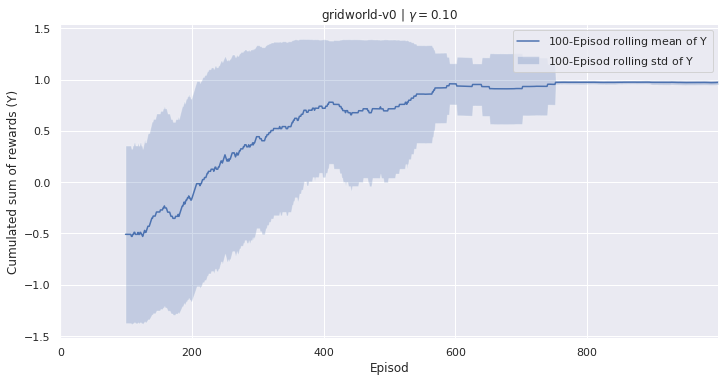

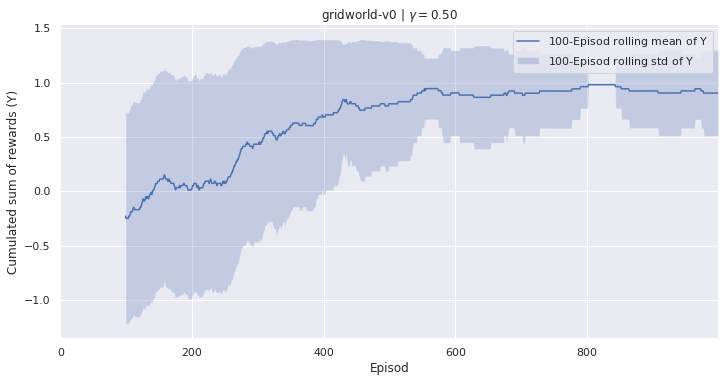

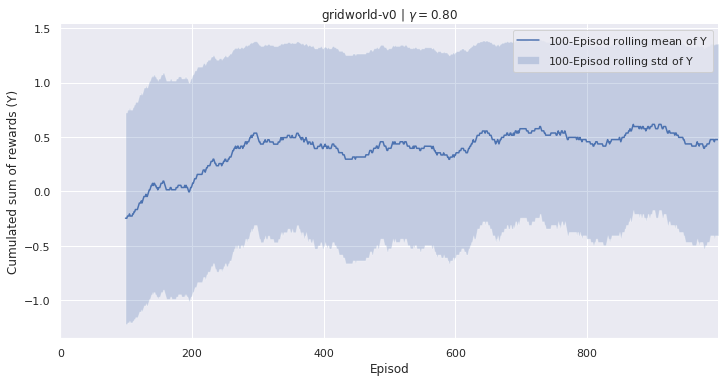

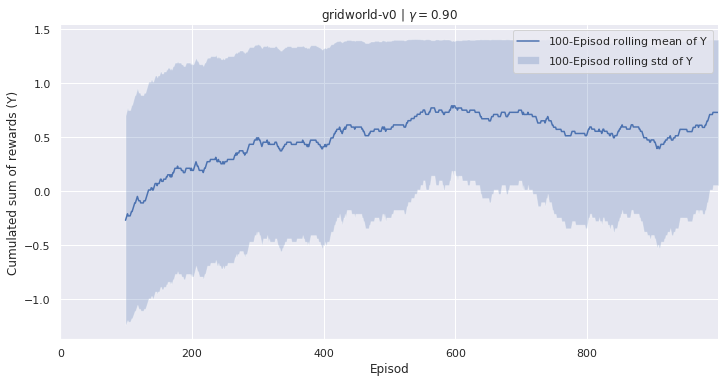

In [50]:
import pandas as pd
import seaborn as sns

window = 100
for i in range(len(rsum_hist_gammas)):
    rsum_hist = rsum_hist_gammas[i]
    data = pd.concat([pd.Series(rsum_hist, name='mean').rolling(window).mean(),
              pd.Series(rsum_hist, name='std').rolling(window).std()],
              axis=1)

    sns.set()
    plt.figure(figsize=(10,5))
    ax = data['mean'].plot()

    ax.fill_between(data.index, data['mean'] - data['std'], data['mean'] + data['std'],
                    alpha=.25)
    plt.tight_layout()
    plt.ylabel("Cumulated sum of rewards (Y)")

    title = r"gridworld-v0 | $\gamma = %.2f$"%gammas[i]

    plt.title(title)

    plt.legend(['$%d$-Episod rolling mean of Y'%window, '$%d$-Episod rolling std of Y'%window])
    plt.xlabel('Episod')
    sns.despine()


In [4]:
import matplotlib

matplotlib.use("TkAgg")
import gym
import gridworld
from gym import wrappers, logger
import numpy as np
import copy


class Policy:
    def __init__(self, statedic, env, gamma = 0.8):
        """Initialisation alÃ©atoire de la politique"""
        self.value = {}
        for state in statedic.keys():
            self.value[state] = env.action_space.sample()
        self.gamma = gamma

    def update(self, mdp):
        old_value = (self.value).copy()
        print(mdp.keys())
        for state in self.value.keys():
                #self.value[state] = mdp[1][state]
                print("state mdp: {}".format(list(mdp.values())[1][state]))

class ValueIterationAgent(object):
    """Agent based on Value Iteration"""

    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
         # {South:0, North:1, West:2, East:3}
        return self.action_space.sample()


if __name__ == '__main__':

    # Simple execution
    env = gym.make("gridworld-v0")
    env.seed(0)  # Initialise le seed du pseudo-random
    print(env.action_space)  # Quelles sont les actions possibles
    print(env.step(1))  # faire action 1 et retourne l'observation, le reward, et un done un booleen (jeu fini ou pas)
    env.verbose = False
    env.render()  # permet de visualiser la grille du jeu (si verbose = True)
    statedic, mdp = env.getMDP()  # recupere le mdp : statedic
    P = Policy(statedic, env)
    P.update(mdp)
    print(len(statedic))  # nombre d'etats ,statedic : etat-> numero de l'etat
    state, transitions = list(mdp.items())[0]
    print(state)  # un etat du mdp
    print(transitions)  # dictionnaire des transitions pour l'etat :  {action-> [proba,etat,reward,done]}

    # Execution avec un Agent
    agent = ValueIterationAgent(env.action_space)

    # Faire un fichier de log sur plusieurs scenarios
    outdir = 'gridworld-v0/value-iteration-agent-results'
    envm = wrappers.Monitor(env, directory=outdir, force=True, video_callable=False)
    env.setPlan("gridworldPlans/plan6.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})
    env.seed()  # Initialiser le pseudo aleatoire
    episode_count = 1000
    reward = 0
    done = False
    rsum = 0
    for i in range(episode_count):
        obs = envm.reset()
        env.verbose = (i % 100 == 0 and i > 0)  # afficher 1 episode sur 100
        env.render(0.1)
        j = 0
        rsum = 0
        while True:
            action, value = agent.act(obs, reward, done)
            obs, reward, done, _ = envm.step(action)

            rsum += reward
            j += 1
            env.render()
            if done:
                print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
                break

    print("done")
    env.close()


['1 1 1 1 1 1\n', '1 0 0 0 3 1\n', '1 0 1 0 5 1\n', '1 0 0 0 2 1\n', '1 1 1 1 1 1\n', '1 1 1 1 1 1']
Discrete(4)
(array([[1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 3, 1],
       [1, 0, 1, 0, 2, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]]), -1, True, {})
dict_keys([b'\x80\x02cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02c_codecs\nencode\nq\x03X\x01\x00\x00\x00bq\x04X\x06\x00\x00\x00latin1q\x05\x86q\x06Rq\x07\x87q\x08Rq\t(K\x01K\x06K\x06\x86q\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00i8q\x0cK\x00K\x01\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00<q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89h\x03X \x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

KeyError: b'\x80\x02cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02c_codecs\nencode\nq\x03X\x01\x00\x00\x00bq\x04X\x06\x00\x00\x00latin1q\x05\x86q\x06Rq\x07\x87q\x08Rq\t(K\x01K\x06K\x06\x86q\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00i8q\x0cK\x00K\x01\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00<q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89h\x03X \x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00q\x11h\x05\x86q\x12Rq\x13tq\x14b.'